In [ ]:
# A program that strategizes buying or selling of a stock based on three moving averages
# a short, medium and long term moving average is calculated
# 1)First buy metric is when medium moving average moves above the long term moving average and short crosses above medium
# 2)Sell if short term moves below medium 
# 3) Buy if medium crosses below the long and short crosses below the medium
# 4) Sell if short crosses above medium

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import yfinance as yf
%matplotlib inline

In [8]:
# load the stock data 
# New Yahoo Finance workaround
yf.pdr_override()


In [9]:
StockStart = '2018-07-01'
StockEnd = datetime.today().strftime('%Y-%m-%d')

In [41]:
df = pdr.get_data_yahoo('TSLA',start=StockStart,end=StockEnd) # enter in ticker in quotations

[*********************100%***********************]  1 of 1 completed


In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,360.070007,364.779999,329.850006,335.070007,335.070007,18759800
2018-07-03,331.750000,332.489990,309.690002,310.859985,310.859985,12282600
2018-07-05,313.760010,314.390015,296.220001,309.160004,309.160004,17476400
2018-07-06,304.950012,312.070007,302.000000,308.899994,308.899994,8865500
2018-07-09,311.989990,318.519989,308.000000,318.510010,318.510010,7596800


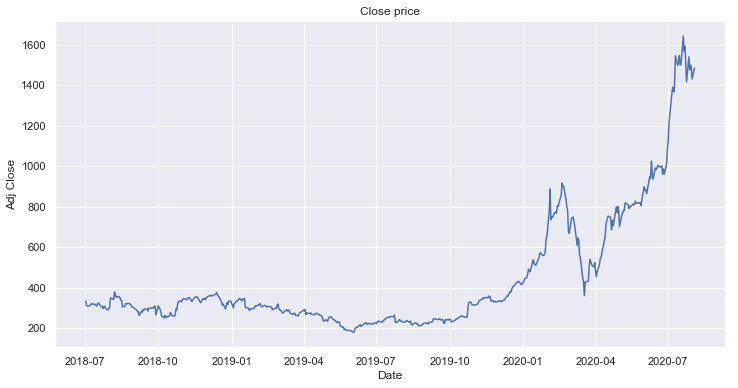

In [43]:
# Visual the close price
plt.figure(figsize=(12,6))
plt.title('Close price')

sns.lineplot(y=df['Adj Close'],x=df.index, data=df)

In [44]:
# Calculate the three exponential moving averages
df['EMA9'] = round(df['Adj Close'].ewm(span=9, adjust=False).mean(),2)
df['EMA21'] = round(df['Adj Close'].ewm(span=21, adjust=False).mean(),2)
df['EMA55'] = round(df['Adj Close'].ewm(span=55, adjust=False).mean(),2)


In [45]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA9,EMA21,EMA55
Date,,,,,,,,,
2020-07-28,1504.000000,1564.699951,1474.420044,1476.489990,1476.489990,15808700,1500.41,1405.95,1166.46
2020-07-29,1501.000000,1534.810059,1487.000000,1499.109985,1499.109985,9426900,1500.15,1414.42,1178.34
2020-07-30,1488.000000,1513.239990,1471.000000,1487.489990,1487.489990,7621000,1497.62,1421.06,1189.38
2020-07-31,1515.000000,1517.050049,1420.979980,1430.760010,1430.760010,12247000,1484.24,1421.94,1198.00
2020-08-03,1449.199951,1509.810059,1444.380005,1485.000000,1485.000000,8791500,1484.40,1427.68,1208.25


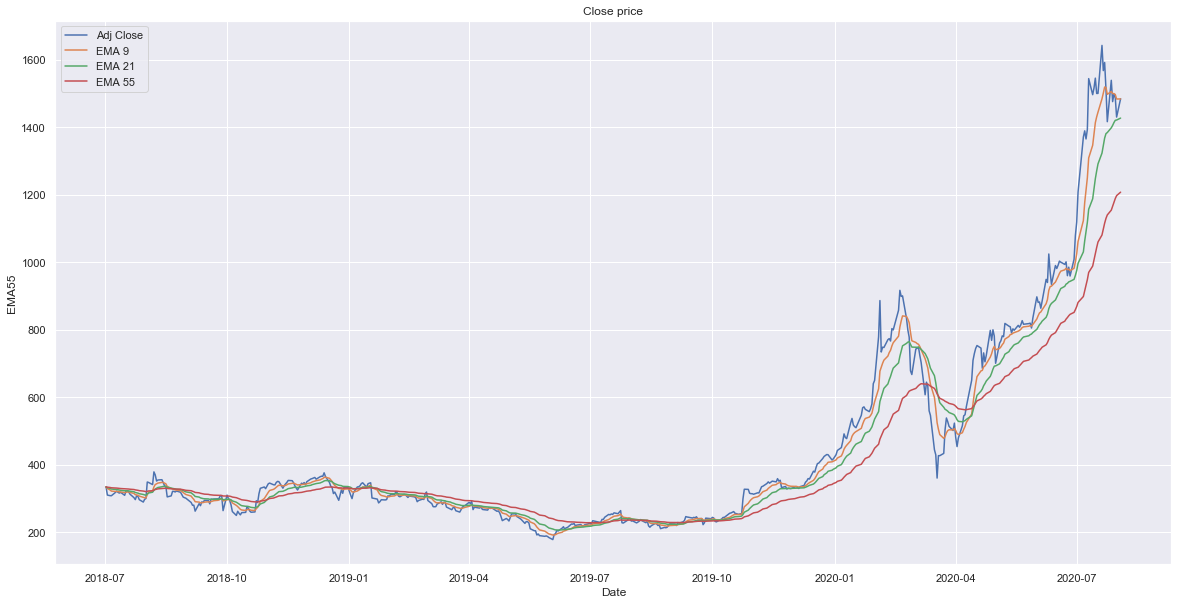

In [46]:
plt.figure(figsize=(20,10))
plt.title('Close price')

sns.lineplot(y=df['Adj Close'],x=df.index, data=df, label = 'Adj Close')
sns.lineplot(y=df['EMA9'],x=df.index, data=df, label = 'EMA 9')
sns.lineplot(y=df['EMA21'],x=df.index, data=df, label = 'EMA 21')
sns.lineplot(y=df['EMA55'],x=df.index, data=df, label = 'EMA 55')
plt.legend()

In [47]:
# Create the trading strategy, a function that indicates when to buy/sell stock
def trade(data):
    
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    # FIRST BUY AND SELL FOR LOOP 
    for i in range(0,len(data)):
        if (data['EMA21'][i] < data['EMA55'][i]) and (data['EMA9'][i] < data['EMA21'][i]) and flag_long == False and flag_short == False:
            buy_list.append(data['Adj Close'][i])
            sell_list.append(np.nan)
            flag_short = True
            
        elif flag_short == True and (data['EMA9'][i] > data['EMA21'][i]):
            sell_list.append(data['Adj Close'][i])
            buy_list.append(np.nan)
            flag_short = False
            
        elif (data['EMA21'][i] > data['EMA55'][i]) and (data['EMA9'][i] > data['EMA21'][i]) and flag_long == False and flag_short == False:
            buy_list.append(data['Adj Close'][i])
            sell_list.append(np.nan)
            flag_long = True
            
        elif flag_short == True and (data['EMA9'][i] < data['EMA21'][i]):
            sell_list.append(data['Adj Close'][i])
            buy_list.append(np.nan)
            flag_long = False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    
    return(buy_list,sell_list)                  

In [48]:
# Add the buy and sell singals to the dataframe
df['Buy'] = trade(df)[0]
df['Sell'] = trade(df)[1]

In [49]:
df.count().isnull()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
EMA9         False
EMA21        False
EMA55        False
Buy          False
Sell         False
dtype: bool

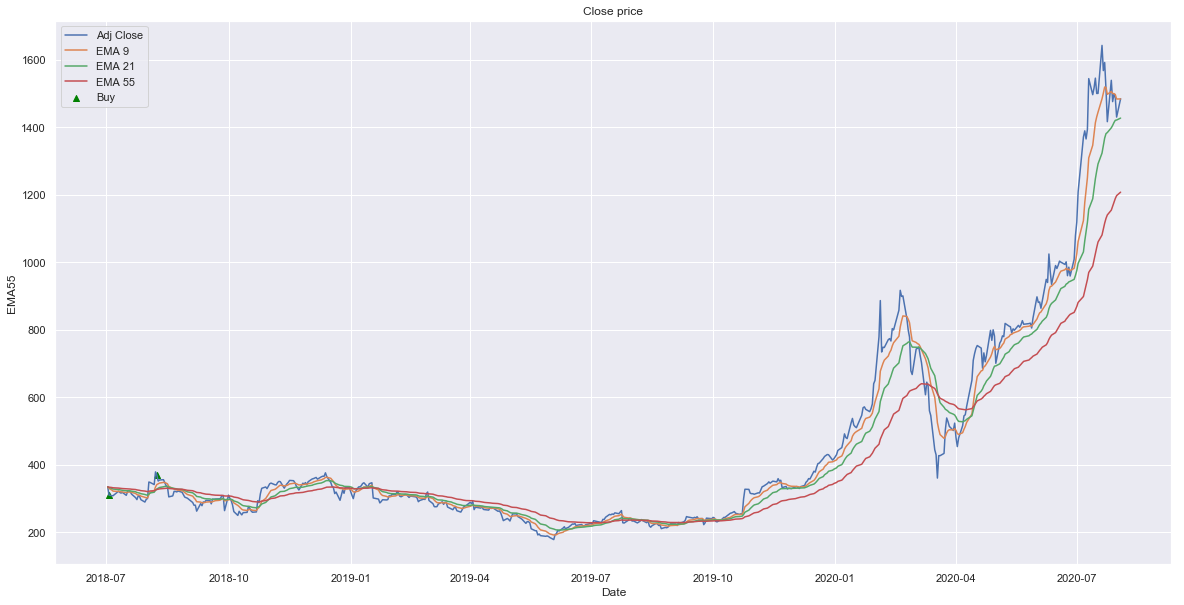

In [50]:
plt.figure(figsize=(20,10))
plt.title('Close price')

sns.lineplot(y=df['Adj Close'],x=df.index, data=df, label = 'Adj Close')
sns.lineplot(y=df['EMA9'],x=df.index, data=df, label = 'EMA 9')
sns.lineplot(y=df['EMA21'],x=df.index, data=df, label = 'EMA 21')
sns.lineplot(y=df['EMA55'],x=df.index, data=df, label = 'EMA 55')
plt.scatter(df.index,df['Buy'], color = 'green', marker ='^')

plt.legend()